In [2]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys

if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib import plotting

matplotlib.style.use('ggplot')

C:\Anaconda3\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


## WindyGrid world 

# Environment

한스탭 지날때마다 -1 reward, 중간쯤부터 계속 바람이 불어서 한칸씩 밀린다!

# action

0,1,2,3 - 동서남북

# Goal 

최적의 policy를 찾는것!

<img src='../ficture/windygreedy.JPG' width=400 height=550 />

In [3]:
env = WindyGridworldEnv()

# epsilon_greedy policy 정의

observation : 현재 state  

In [4]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """

    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [13]:
Q

defaultdict(<function __main__.sarsa.<locals>.<lambda>>,
            {0: array([-15.82503369, -15.67592237, -15.72577405, -15.62050851]),
             1: array([-15.8175558 , -15.35760367, -15.20995383, -15.45498088]),
             2: array([-15.27483356, -14.18805528, -14.58913045, -15.14496165]),
             3: array([-14.71915131, -13.81531493, -14.57116675, -14.20446028]),
             4: array([-14.07106173, -13.48967654, -13.89600257, -14.08806349]),
             5: array([-13.22863121, -12.359845  , -13.23231993, -12.8550109 ]),
             6: array([-12.2460227 , -11.0439251 , -12.25412528, -12.06744592]),
             7: array([-11.37212592,  -9.67686888, -11.14571544, -11.26310673]),
             8: array([ -9.93652043,  -8.15047488, -10.97859952, -10.90850352]),
             9: array([ -8.70029031,  -9.13416018,  -6.78084594, -10.56858441]),
             10: array([-15.98760689, -15.75204643, -15.99881839, -16.03659481]),
             11: array([-15.1221949 , -15.21298264,

In [11]:
A=np.ones(4,dtype=float) * 0.1 / 4
#array([ 0.025,  0.025,  0.025,  0.025])

np.argmax(Q[1])
#2

A[2] += (1.0 - 0.1)
A
#beset_action에 갈확률 0.925고 나머지는 0.025

NameError: name 'Q' is not defined

# default_dic

The default factory is called without arguments to produce
a new value when a key is not present

생성자를 지정할수 있는 dictionary이다. 스테이트가 많으니까 이걸로 생성

In [9]:
default_dic = defaultdict(lambda: np.zeros(env.action_space.n))
print(default_dic[0] ,default_dic[1])

[ 0.  0.  0.  0.] [ 0.  0.  0.  0.]


In [10]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Lambda time discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        $action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        
        # One step in the environment
        for t in itertools.count():
            # Take a step
            next_state, reward, done, _ = env.step(action)
            
            # Pick the next action
            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # TD Update
            td_target = reward + discount_factor * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
    
            if done:
                break
                
            action = next_action
            state = next_state        
    
    return Q, stats

<img src='../ficture/sarsa.JPG' width=600 height=550 />

In [1]:
np.random.choice(np.arange(4), p=[ 0.025,  0.025,  0.925,  0.025])

NameError: name 'np' is not defined

In [20]:
np.arange(4)

array([0, 1, 2, 3])

In [12]:
Q, stats = sarsa(env, 200)

Episode 200/200.

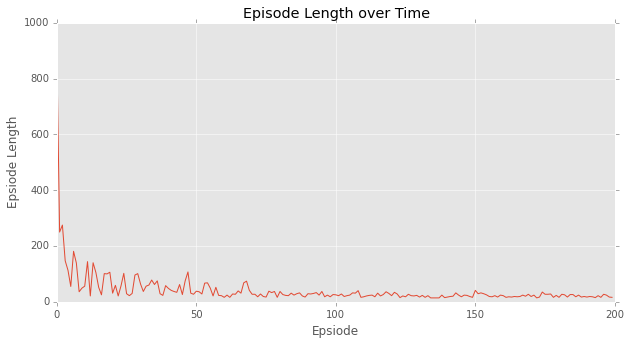

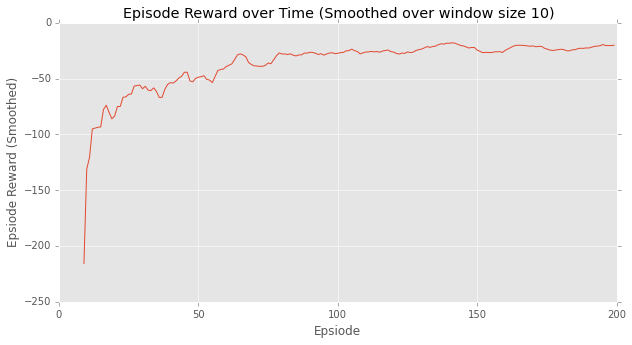

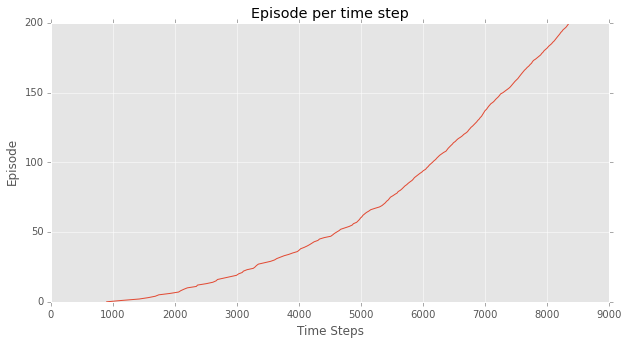

(<matplotlib.figure.Figure at 0x84702e8>,
 <matplotlib.figure.Figure at 0x875f048>)

In [22]:
plotting.plot_episode_stats(stats)